## **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

## **Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ratings_Beauty (1).csv")

## **Inspecting and visualizing the dataset**

### General property of the dataset

In [ ]:
# Check the shape of the dataset
print("Dataset shape: ", data.shape)

# Look at the first few rows of the dataset
print("\nFirst few rows of the dataset: \n")
print(data.head())

Dataset shape:  (1048575, 4)

First few rows of the dataset: 

           UserId  ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  205616461       5  1369699200
1  A3JM6GV9MNOF9X  558925278       3  1355443200
2  A1Z513UWSAAO0F  558925278       5  1404691200
3  A1WMRR494NWEWV  733001998       4  1382572800
4  A3IAAVS479H7M7  737104473       1  1274227200


Number of duplicated entries: 0

Number of unique users: 736653
Number of unique products: 97987
Number of total ratings: 1048575


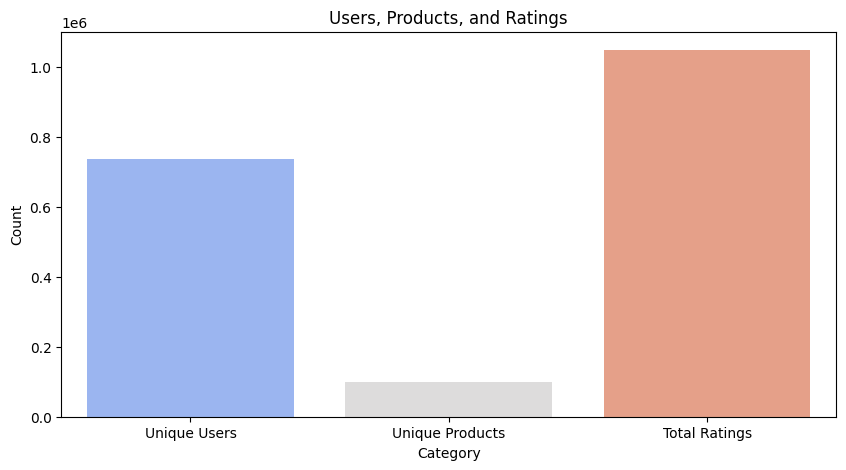

In [ ]:
# Remove rows with any null values
df_cleaned = data.dropna()

# Check for duplicate rows
duplicates = df_cleaned.duplicated(["UserId", "ProductId", "Rating", "Timestamp"]).sum()
print("Number of duplicated entries:", duplicates)

num_unique_users = df_cleaned["UserId"].nunique()
num_unique_products = df_cleaned["ProductId"].nunique()
num_total_ratings = df_cleaned.shape[0]

print("\nNumber of unique users:", num_unique_users)
print("Number of unique products:", num_unique_products)
print("Number of total ratings:", num_total_ratings)

summary_df = pd.DataFrame({
    "Category": ["Unique Users", "Unique Products", "Total Ratings"],
    "Count": [num_unique_users, num_unique_products, num_total_ratings]
})

plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Count", data=summary_df, palette="coolwarm")

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Users, Products, and Ratings")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Check if there are any null entries
print("Are there any null entries?\n")
print(df_cleaned.isnull().any())

Are there any null entries?

UserId       False
ProductId    False
Rating       False
Timestamp    False
dtype: bool


### About the ratings

Number of ratings for each rating value:

Rating
5    664210
4    151249
1     94265
3     81742
2     57109
Name: count, dtype: int64


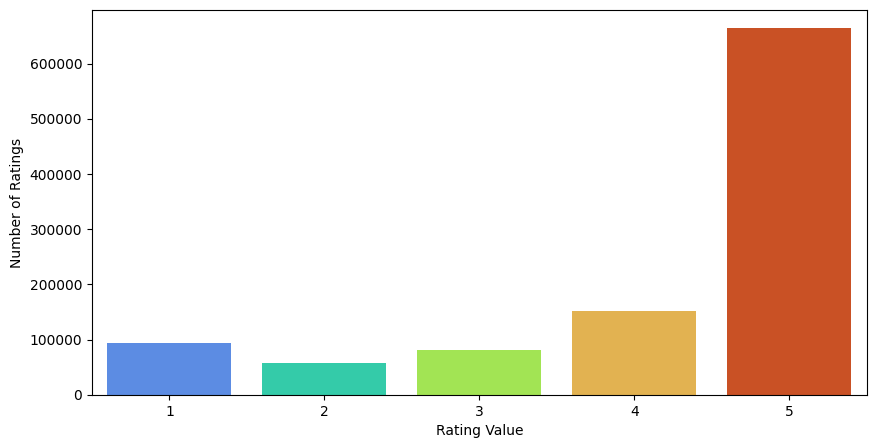

In [ ]:
# Count number of ratings for each rating value
rating_counts = df_cleaned["Rating"].value_counts()

print("Number of ratings for each rating value:\n")
print(rating_counts)

# Plot the graph
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="turbo")

# Add labels and title
plt.xlabel("Rating Value")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=0)

# Show the plot
plt.show()


### About the users

Number of ratings given by each user:

UserId
A3M174IC0VXOS2    278
A281NPSIMI1C2R    245
A1RRMZKOMZ2M7J    200
A3KEZLJ59C1JVH    178
A2V5R832QCSOMX    173
                 ... 
A2EN78X3UUIDWC      1
A2EN8CLEDQWW2F      1
A2EN8RCHBAAEC3      1
A2EN90ONMJDEX8      1
A2W0NJ1ITJKHLR      1
Name: Rating, Length: 736653, dtype: int64


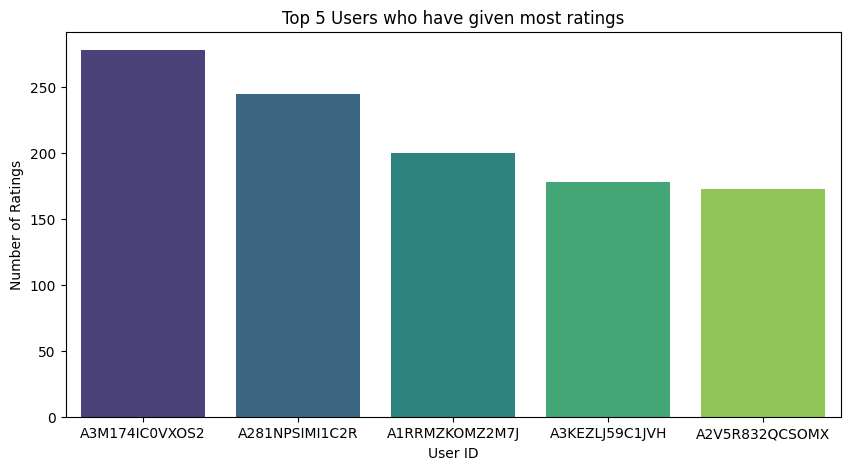

In [ ]:
# Number of ratings given by each user
rated_users = df_cleaned.groupby("UserId")["Rating"].count().sort_values(ascending = False)

print("Number of ratings given by each user:\n")
print(rated_users)

# Count number of ratings per user
top_users = df_cleaned['UserId'].value_counts().head(5)

top_users.index = top_users.index.astype(str)

# Plot the graph
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index, y=top_users.values, hue=top_users.index,
            palette="viridis", legend=False)

plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Top 5 Users who have given most ratings")
plt.xticks(rotation=0)

plt.show()

### About the products

Number of ratings received by each product:

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0000YUXI0    2143
B000ZMBSPE    2041
B003BQ6QXK    1918
              ... 
B001NRE61I       1
B000N4B02K       1
B000N4AO18       1
B001NRTH1W       1
1304139212       1
Name: Rating, Length: 97987, dtype: int64


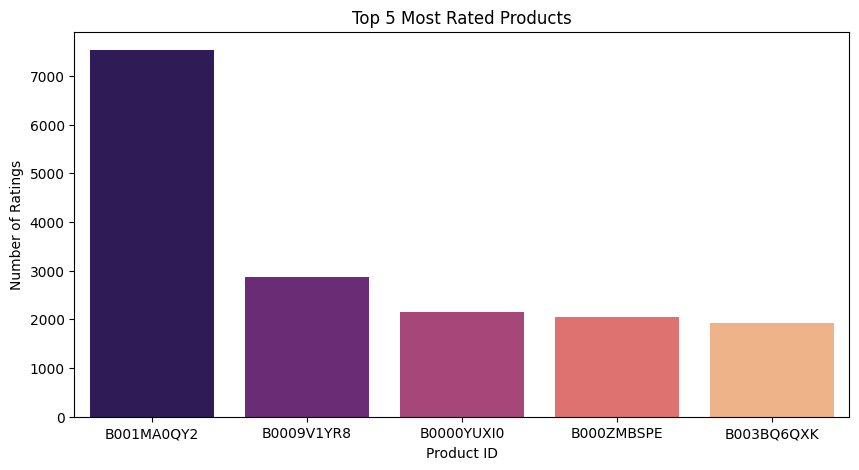

In [ ]:
# Number of ratings received by each product
rated_products = df_cleaned.groupby("ProductId")["Rating"].count().sort_values(ascending = False)

print("Number of ratings received by each product:\n")
print(rated_products)

import matplotlib.pyplot as plt
import seaborn as sns

top_rated_products = df_cleaned.groupby("ProductId")["Rating"].count().sort_values(ascending=False).head(5)

top_rated_products.index = top_rated_products.index.astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_products.index, y=top_rated_products.values,
            hue=top_rated_products.index, palette="magma", legend=False)

plt.xlabel("Product ID")
plt.ylabel("Number of Ratings")
plt.title("Top 5 Most Rated Products")
plt.xticks(rotation=0)

plt.show()

# Creating a Table which shows details about the **product**

In [ ]:
# number of unique ratings for each product
unique_ratings_count = data.groupby('ProductId')['Rating'].count()

# average rating for each product
average_ratings = data.groupby('ProductId')['Rating'].mean()

product_summary = pd.DataFrame({
    'Number of User Ratings': unique_ratings_count,
    'Average Rating': average_ratings
})

product_summary = product_summary.sort_values(by='Number of User Ratings', ascending=False)

print(product_summary)

            Number of User Ratings  Average Rating
ProductId                                         
B001MA0QY2                    7533        4.321386
B0009V1YR8                    2869        3.568839
B0000YUXI0                    2143        4.405040
B000ZMBSPE                    2041        4.422342
B003BQ6QXK                    1918        4.625652
...                            ...             ...
B001NRE61I                       1        5.000000
B000N4B02K                       1        1.000000
B000N4AO18                       1        5.000000
B001NRTH1W                       1        5.000000
1304139212                       1        5.000000

[97987 rows x 2 columns]


# Calculating and assigning a score for each product

In [ ]:
unique_ratings_count = data.groupby('ProductId')['Rating'].count()
average_ratings = data.groupby('ProductId')['Rating'].mean()

# Total number of users in the dataset
total_users = data['UserId'].nunique()
print(total_users)


product_summary = pd.DataFrame({
    'Number of User Ratings': unique_ratings_count,
    'Average Rating': average_ratings
})


product_summary['Score'] = (
    product_summary['Number of User Ratings'] * product_summary['Average Rating']
) / total_users


product_summary = product_summary.sort_values(by='Score', ascending=False)

print(product_summary)

736653
            Number of User Ratings  Average Rating     Score
ProductId                                                   
B001MA0QY2                    7533        4.321386  0.044190
B0009V1YR8                    2869        3.568839  0.013899
B0000YUXI0                    2143        4.405040  0.012815
B000ZMBSPE                    2041        4.422342  0.012253
B003BQ6QXK                    1918        4.625652  0.012044
...                            ...             ...       ...
B000UEXXWS                       1        1.000000  0.000001
B00067XN7Y                       1        1.000000  0.000001
B0014JTYQM                       1        1.000000  0.000001
B001BKTGA8                       1        1.000000  0.000001
B00261OD3G                       1        1.000000  0.000001

[97987 rows x 3 columns]


In [ ]:

total_users = data['UserId'].nunique()

product_summary['Score'] = (
    product_summary['Number of User Ratings'].fillna(0) *
    product_summary['Average Rating'].fillna(0)
) / total_users

scaling_factor = 1_000_000

product_summary['Score'] = (product_summary['Score'] * scaling_factor).round().astype(int)

product_summary = product_summary.sort_values(by='Score', ascending=False)

print(product_summary)

            Number of User Ratings  Average Rating  Score
ProductId                                                
B001MA0QY2                    7533        4.321386  44190
B0009V1YR8                    2869        3.568839  13899
B0000YUXI0                    2143        4.405040  12815
B000ZMBSPE                    2041        4.422342  12253
B003BQ6QXK                    1918        4.625652  12044
...                            ...             ...    ...
B0011DRYTA                       1        1.000000      1
B002LMU35C                       1        1.000000      1
B000H6F610                       1        1.000000      1
B000AAAWDA                       1        1.000000      1
B00261OD3G                       1        1.000000      1

[97987 rows x 3 columns]


            Number of User Ratings  Average Rating  Score
ProductId                                                
B001MA0QY2                    7533        4.321386  44190
B0009V1YR8                    2869        3.568839  13899
B0000YUXI0                    2143        4.405040  12815
B000ZMBSPE                    2041        4.422342  12253
B003BQ6QXK                    1918        4.625652  12044
...                            ...             ...    ...
B001FSK6ZU                      17        4.352941    100
B001KOTQWS                      17        4.352941    100
B000JWO870                      20        3.700000    100
B0015EOB50                      16        4.625000    100
B000FPVM70                      18        4.111111    100

[11581 rows x 3 columns]
+------------+------------------------+--------------------+---------+
| ProductId  | Number of User Ratings |   Average Rating   |  Score  |
+------------+------------------------+--------------------+---------+
| B001M

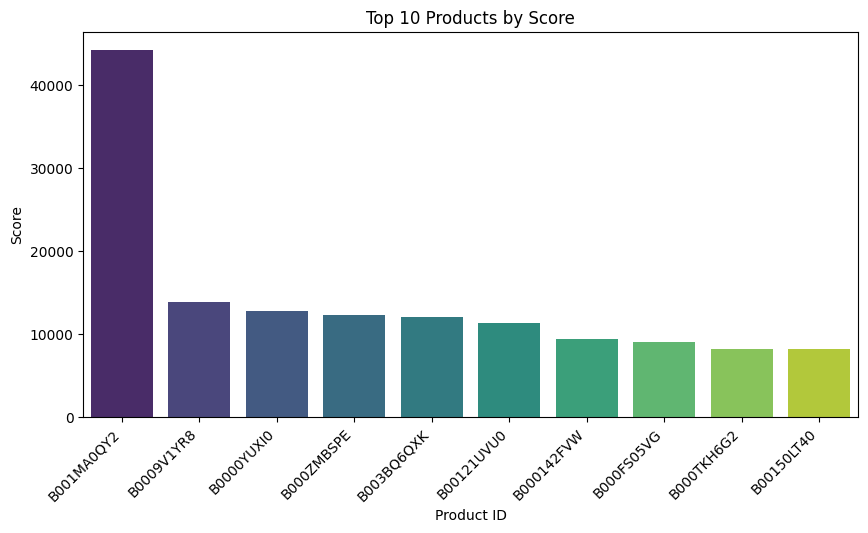

In [ ]:
# Filtering out products with a score less than 100
filtered_data = product_summary[product_summary['Score'] >= 100]

print(filtered_data)

print(tabulate(filtered_data.head(10), headers='keys', tablefmt='pretty'))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=filtered_data.head(10).index,
            y=filtered_data["Score"].head(10),
            palette="viridis")

plt.xlabel("Product ID")
plt.ylabel("Score")
plt.title("Top 10 Products by Score")
plt.xticks(rotation=45, ha='right')

plt.show()



# **Content-based Filtering using Cosine Similarity**

In [ ]:
df = filtered_data.copy()

# Select relevant numerical features
df_features = df[['Number of User Ratings', 'Average Rating', 'Score']]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Cosine Similarity
cosine_sim = cosine_similarity(df_scaled)

# Convert into a DataFrame with product IDs as index and columns
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)
print(cosine_sim_df)


ProductId   B001MA0QY2  B0009V1YR8  B0000YUXI0  B000ZMBSPE  B003BQ6QXK  \
ProductId                                                                
B001MA0QY2    1.000000    0.993802    0.999851    0.999789    0.998637   
B0009V1YR8    0.993802    1.000000    0.991908    0.991510    0.986932   
B0000YUXI0    0.999851    0.991908    1.000000    0.999995    0.999384   
B000ZMBSPE    0.999789    0.991510    0.999995    1.000000    0.999492   
B003BQ6QXK    0.998637    0.986932    0.999384    0.999492    1.000000   
...                ...         ...         ...         ...         ...   
B001FSK6ZU   -0.884725   -0.906345   -0.877905   -0.876632   -0.864985   
B001KOTQWS   -0.884725   -0.906345   -0.877905   -0.876632   -0.864985   
B000JWO870   -0.382508   -0.329614   -0.395379   -0.397704   -0.417574   
B0015EOB50   -0.504158   -0.549426   -0.491878   -0.489627   -0.469785   
B000FPVM70   -0.878116   -0.847652   -0.884559   -0.885697   -0.894929   

ProductId   B00121UVU0  B000142FVW  B

# **Implementing Product Recommendation Function**

In [ ]:
def recommend_products(top_n=5):
    product_id = input("Enter Product ID: ").strip()  # Get product ID as string input

    if product_id not in cosine_sim_df.index:
        return "Product not found!"

    # Get top-N similar products
    similar_products = cosine_sim_df[product_id].sort_values(ascending=False).iloc[1:top_n+1]

    # Convert to DataFrame for better formatting
    recommended_df = similar_products.reset_index()
    recommended_df.columns = ["Product ID", "Similarity Score"]

    # Print recommendations in table format
    print("\nContent-based Recommended Products:\n")
    print(tabulate(recommended_df, headers='keys', tablefmt='pretty'))

# Call the function and display recommendations
recommend_products()


Enter Product ID: B001MA0QY2

Content-based Recommended Products:

+---+------------+--------------------+
|   | Product ID |  Similarity Score  |
+---+------------+--------------------+
| 0 | B001CZL7VS |  0.99999769752352  |
| 1 | B000XSF1X0 | 0.9999955593025388 |
| 2 | B00028OSI0 | 0.9999766548728544 |
| 3 | B0009FHJRS | 0.9999676038156585 |
| 4 | B00176B9JC | 0.9999661879279309 |
+---+------------+--------------------+


# **Combining both tables using productid**

In [ ]:
# Merge both tables using 'ProductId' as the common key
df_merged = pd.merge(data,filtered_data , on='ProductId', how='inner')
df_merged.drop(columns=['Timestamp'], inplace=True)

print(df_merged)

                UserId   ProductId  Rating  Number of User Ratings  \
0       A10REFE1TW3ZVT  3227001381       5                      25   
1       A3M7ROZKQW6F69  3227001381       4                      25   
2       A271KYL82709TY  3227001381       5                      25   
3       A1OON4OPP58E26  3227001381       5                      25   
4       A3COLQK8Y9V9A5  3227001381       5                      25   
...                ...         ...     ...                     ...   
734802  A31P1LMEXJ8MML  B003H897AQ       1                      85   
734803   A6U8SW1MFX122  B003H897AQ       4                      85   
734804  A2ND0PP8HY7KBE  B003H897AQ       1                      85   
734805   AC9W044EAHP8P  B003H897AQ       1                      85   
734806   AXCFH81C3PM6O  B003H897AQ       4                      85   

        Average Rating  Score  
0             4.560000    155  
1             4.560000    155  
2             4.560000    155  
3             4.560000    155  

# **Details about the product**

In [ ]:
df = df_merged[['UserId', 'ProductId', 'Rating']]

total_users = df['UserId'].nunique()

def get_product_details():

    product_id = input("Enter Product ID: ").strip()

    if product_id not in df['ProductId'].values:
        return "Product not found!"

    # Get users who rated the product and their ratings
    product_data = df[df['ProductId'] == product_id]

    # Extract users who rated this product
    users_who_rated = product_data[['UserId', 'Rating']].reset_index(drop=True)

    # Calculate the average rating of the product
    avg_rating = product_data['Rating'].mean()

    # Count number of ratings for this product
    num_ratings = len(product_data)

    # Compute product score using the given formula
    scaling_factor = 1_000_000
    product_score = int(((num_ratings * avg_rating) / total_users) * scaling_factor)

    print(f"\n🔹 Product ID: {product_id}")
    print(f"🔹 Total Ratings: {num_ratings}")
    print(f"🔹 Average Rating: {avg_rating:.2f}")
    print(f"🔹 Product Score: {product_score}\n")
    print(f"🔹 Users who rated this product:\n")
    print(users_who_rated.to_string(index=False))

get_product_details()

Streaming output truncated to the last 5000 lines.
       A3SCMAU91M8XRL       2
        AX6DXOCL6UGTA       3
       A139URULUIF1V8       1
        A93I0JKDZOK0P       5
       A38NZYVHOD71S7       5
        AXWPSKJO0YNBR       4
        AD6MN1P48LUVJ       5
       A1UNFXDJPX4K8G       5
       A2DUJJEXQP8FOJ       3
       A3338MICUM2FAF       5
       A3NL2MGRFCCQA0       4
       A1X7RDN2VUHZ0L       5
        A5CBFKP5SQXX5       5
       A3LZBN54U1MR5A       5
       A2SNI678F3L0MW       4
       A3MQF6X3V2S4ZK       5
       A3PMQL6YHF97KY       5
       A2SVF0L0YGYU98       5
       A3T4K8INC0EAFG       5
        AY58ZXER0M46Y       5
        ALABR8LWD5WNM       5
       A1MKOFBFZ2VIL6       4
       A1LU8DE959R7FV       5
       A1MJ9I5H0HBHWD       5
       A2G9QW6CK642WB       1
        AI5NSSLIICKLC       1
       A1SFQWQZXL0K0G       5
       A13X4VIMZPP4OP       4
       A3VGDXJ2BZA2E3       5
        AIAGBW6O2GQYL       5
       A1EE7ZS8LYLPUV       5
        AIJUZU5DRAF

# **Collaborative Filtering**

# **Memory-based collaborative filtering**

In [ ]:
# Select relevant columns
df = df_merged[['UserId', 'ProductId', 'Rating']].copy()

# Convert to categorical data type
df['UserId'] = df['UserId'].astype('category')
df['ProductId'] = df['ProductId'].astype('category')

# Create a sparse User-Item matrix
user_item_sparse = csr_matrix(
    (df['Rating'].values, (df['UserId'].cat.codes.values, df['ProductId'].cat.codes.values))
)

# Compute Cosine Similarity between products
product_similarity = cosine_similarity(user_item_sparse.T)

# Convert similarity matrix into a DataFrame
product_ids = df['ProductId'].cat.categories  # Extract Product IDs
product_similarity_df = pd.DataFrame(product_similarity, index=product_ids, columns=product_ids)

def recommend_memory_based(top_n=5):
    """Recommend top-N similar products using Memory-Based Collaborative Filtering."""

    product_id = input("Enter Product ID: ").strip()

    if product_id not in product_similarity_df.index:
        return "Product not found!"

    # Get similarity scores for the given product
    similar_products = product_similarity_df[product_id].sort_values(ascending=False)

    # Return top-N similar products (excluding the input product itself)
    recommended_df = pd.DataFrame(similar_products.iloc[1:top_n+1]).reset_index()
    recommended_df.columns = ["Product ID", "Similarity Score"]

    return recommended_df

# Get Recommendations
recommended_products = recommend_memory_based()

# Display Recommendations in a Table Format
if isinstance(recommended_products, str):  # If "Product not found!" is returned
    print(recommended_products)
else:
    print("\nMemory-Based Recommended Products:")
    print(tabulate(recommended_products, headers='keys', tablefmt='pretty'))

Enter Product ID: B001MA0QY2

Memory-Based Recommended Products:
+---+------------+----------------------+
|   | Product ID |   Similarity Score   |
+---+------------+----------------------+
| 0 | B000O7BA9Y | 0.006923213960666205 |
| 1 | B000VXVEGA | 0.006850334274546106 |
| 2 | B001501N7I | 0.006366897419746693 |
| 3 | B001AV50OO | 0.006226991836790383 |
| 4 | B000AUTH0E | 0.00617645309639529  |
+---+------------+----------------------+


# **Model-based collaborative filtering**

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505167 sha256=f540ebf58b4223adac65cf83c3059416b0bad760d3e67e04ea266f529e03ec09
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from tabulate import tabulate

# Set a fixed seed for reproducibility
np.random.seed(42)

# Load dataset
df = df_merged[['UserId', 'ProductId', 'Rating']]

# Define rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise dataset format
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)

# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize and train the SVD model with fixed seed
svd = SVD(random_state=42)
svd.fit(trainset)

# Extract product latent factors from trained SVD model
product_factors = {trainset.to_raw_iid(iid): svd.qi[iid] for iid in trainset.all_items()}

# Convert to Pandas DataFrame
product_factors_df = pd.DataFrame(product_factors).T

# Build Nearest Neighbors model for fast lookups
nn_model = NearestNeighbors(n_neighbors=20, metric='cosine', algorithm='auto')
nn_model.fit(product_factors_df)

def recommend_model_based_fast(product_id, top_n=5):
    """Recommend top-N similar products using Precomputed Similarities + Nearest Neighbors."""

    if product_id not in product_factors:
        return "Product not found!"

    # Get product vector
    product_vector = product_factors[product_id].reshape(1, -1)

    # Find top-N similar products using Nearest Neighbors
    distances, indices = nn_model.kneighbors(product_vector, n_neighbors=top_n + 1)

    # Extract recommended product IDs
    recommended_products = product_factors_df.iloc[indices[0][1:]].index.tolist()
    similarity_scores = 1 - distances[0][1:]  # Convert cosine distances to similarity scores

    # Convert to DataFrame for better readability
    recommended_df = pd.DataFrame({'Product ID': recommended_products, 'Similarity Score': similarity_scores})

    return recommended_df

# Get product input
product_id = input("Enter Product ID: ").strip()
recommended_products = recommend_model_based_fast(product_id)

# Display recommendations
if isinstance(recommended_products, str):  # If "Product not found!" is returned
    print(recommended_products)
else:
    print("\nModel-Based Recommended Products:")
    print(tabulate(recommended_products, headers='keys', tablefmt='pretty'))


Enter Product ID: B001MA0QY2

Model-Based Recommended Products:
+---+------------+---------------------+
|   | Product ID |  Similarity Score   |
+---+------------+---------------------+
| 0 | B000052YKM | 0.41750973546825265 |
| 1 | B0030F2X6G | 0.37532206909894616 |
| 2 | B000C20ZS8 | 0.3649841222304002  |
| 3 | B002RT7294 | 0.3497942831106995  |
| 4 | B002Q7JYRA | 0.3344203144990787  |
+---+------------+---------------------+


# **Hybrid**

In [ ]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from tabulate import tabulate

# Set seed for reproducibility
np.random.seed(42)

# Load dataset
df = df_merged[['UserId', 'ProductId', 'Rating']].copy()

# Content-Based Filtering (Feature Similarity)
df_features = df.groupby('ProductId').agg({'Rating': ['mean', 'count']}).reset_index()
df_features.columns = ['Product ID', 'Average Rating', 'Number of User Ratings']

# Standardize Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features[['Average Rating', 'Number of User Ratings']])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(df_scaled)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_features['Product ID'], columns=df_features['Product ID'])

# Memory-Based Filtering (User-Item Matrix)
df['UserId'] = df['UserId'].astype('category')
df['ProductId'] = df['ProductId'].astype('category')

user_item_sparse = csr_matrix(
    (df['Rating'].values, (df['UserId'].cat.codes.values, df['ProductId'].cat.codes.values))
)

product_similarity = cosine_similarity(user_item_sparse.T)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=df['ProductId'].cat.categories,
                                     columns=df['ProductId'].cat.categories)

# Model-Based Filtering (SVD + Nearest Neighbors)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd = SVD(random_state=42)
svd.fit(trainset)

product_factors = {trainset.to_raw_iid(iid): svd.qi[iid] for iid in trainset.all_items()}
product_factors_df = pd.DataFrame(product_factors).T

nn_model = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')
nn_model.fit(product_factors_df)

# Hybrid Recommendation Function
def recommend_hybrid(product_id, top_n=5, weights=(0.4, 0.3, 0.3)):
    """Combines Content-Based, Memory-Based, and Model-Based Filtering."""

    if product_id not in cosine_sim_df.index:
        return "Product not found!"

    # Content-Based Recommendations
    content_recs = cosine_sim_df.loc[product_id].sort_values(ascending=False).iloc[1:top_n+1]

    # Memory-Based Recommendations
    memory_recs = product_similarity_df.loc[product_id].sort_values(ascending=False).iloc[1:top_n+1]

    # Model-Based Recommendations
    product_vector = product_factors[product_id].reshape(1, -1)
    distances, indices = nn_model.kneighbors(product_vector, n_neighbors=top_n + 1)
    model_recs = pd.Series(1 - distances[0][1:], index=product_factors_df.iloc[indices[0][1:]].index)

    # Merge Recommendations
    recs_df = pd.DataFrame(index=content_recs.index.union(memory_recs.index).union(model_recs.index))

    recs_df['Content Score'] = content_recs
    recs_df['Memory Score'] = memory_recs
    recs_df['Model Score'] = model_recs

    # Normalize and Combine Scores
    recs_df.fillna(0, inplace=True)
    recs_df['Score'] = (
        weights[0] * recs_df['Content Score'] +
        weights[1] * recs_df['Memory Score'] +
        weights[2] * recs_df['Model Score']
    )

    # Select only the required columns
    recs_df = recs_df[['Score']].sort_values(by='Score', ascending=False).iloc[:top_n].reset_index()
    recs_df.columns = ["Product ID", "Score"]

    return recs_df

# Get Recommendations
product_id = input("Enter Product ID: ").strip()

recommended_products = recommend_hybrid(product_id)

# Display Recommendations
if isinstance(recommended_products, str):
    print(recommended_products)
else:
    print("\nHybrid Recommended Products:")
    print(tabulate(recommended_products, headers='keys', tablefmt='pretty'))


Enter Product ID: B001MA0QY2

Hybrid Recommended Products:
+---+------------+---------------------+
|   | Product ID |        Score        |
+---+------------+---------------------+
| 0 | B000UVZU1S | 0.39999995775418773 |
| 1 | B003F2T0M4 | 0.3999999466178153  |
| 2 | B0007CXX82 | 0.3999999048137809  |
| 3 | B0030HKJ8I | 0.39999987032204576 |
| 4 | B002LE8OX8 | 0.39999972330402667 |
+---+------------+---------------------+


In [ ]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from tabulate import tabulate

# Set seed for reproducibility
np.random.seed(42)

# Load dataset
df = df_merged[['UserId', 'ProductId', 'Rating']].copy()

# Content-Based Filtering (Feature Similarity)
df_features = df.groupby('ProductId').agg({'Rating': ['mean', 'count']}).reset_index()
df_features.columns = ['Product ID', 'Average Rating', 'Number of User Ratings']

# Standardize Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features[['Average Rating', 'Number of User Ratings']])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(df_scaled)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_features['Product ID'], columns=df_features['Product ID'])

# Memory-Based Filtering (User-Item Matrix)
df['UserId'] = df['UserId'].astype('category')
df['ProductId'] = df['ProductId'].astype('category')

user_item_sparse = csr_matrix(
    (df['Rating'].values, (df['UserId'].cat.codes.values, df['ProductId'].cat.codes.values))
)

product_similarity = cosine_similarity(user_item_sparse.T)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=df['ProductId'].cat.categories,
                                     columns=df['ProductId'].cat.categories)

# Model-Based Filtering (SVD + Nearest Neighbors)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd = SVD(random_state=42)
svd.fit(trainset)

product_factors = {trainset.to_raw_iid(iid): svd.qi[iid] for iid in trainset.all_items()}
product_factors_df = pd.DataFrame(product_factors).T

nn_model = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')
nn_model.fit(product_factors_df)

# Hybrid Recommendation Function
def recommend_hybrid(product_id, top_n=5, weights=(0.4, 0.3, 0.3)):
    """Generates hybrid recommendations for any given product ID."""

    if product_id not in cosine_sim_df.index:
        return "Product not found!"

    # Content-Based Recommendations
    content_recs = cosine_sim_df.loc[product_id].sort_values(ascending=False).iloc[1:top_n+1]
    content_recs = pd.DataFrame({"Product ID": content_recs.index, "Similarity Score": content_recs.values})

    # Memory-Based Recommendations
    memory_recs = product_similarity_df.loc[product_id].sort_values(ascending=False).iloc[1:top_n+1]
    memory_recs = pd.DataFrame({"Product ID": memory_recs.index, "Similarity Score": memory_recs.values})

    # Model-Based Recommendations
    product_vector = product_factors[product_id].reshape(1, -1)
    distances, indices = nn_model.kneighbors(product_vector, n_neighbors=top_n + 1)
    model_recs = pd.DataFrame({
        "Product ID": product_factors_df.iloc[indices[0][1:]].index,
        "Similarity Score": 1 - distances[0][1:]
    })

    print("\nContent-based Recommended Products:")
    print(tabulate(content_recs, headers='keys', tablefmt='pretty'))

    print("\nMemory-Based Recommended Products:")
    print(tabulate(memory_recs, headers='keys', tablefmt='pretty'))

    print("\nModel-Based Recommended Products:")
    print(tabulate(model_recs, headers='keys', tablefmt='pretty'))

# Get Recommendations
product_id = input("Enter Product ID: ").strip()
recommend_hybrid(product_id)

Enter Product ID: B001MA0QY2

Content-based Recommended Products:
+---+------------+--------------------+
|   | Product ID |  Similarity Score  |
+---+------------+--------------------+
| 0 | B000UVZU1S | 0.9999998943854692 |
| 1 | B003F2T0M4 | 0.9999998665445382 |
| 2 | B0007CXX82 | 0.9999997620344522 |
| 3 | B0030HKJ8I | 0.9999996758051144 |
| 4 | B002LE8OX8 | 0.9999993082600667 |
+---+------------+--------------------+

Memory-Based Recommended Products:
+---+------------+----------------------+
|   | Product ID |   Similarity Score   |
+---+------------+----------------------+
| 0 | B000O7BA9Y | 0.006923213960666205 |
| 1 | B000VXVEGA | 0.006850334274546106 |
| 2 | B001501N7I | 0.006366897419746693 |
| 3 | B001AV50OO | 0.006226991836790383 |
| 4 | B000AUTH0E | 0.00617645309639529  |
+---+------------+----------------------+

Model-Based Recommended Products:
+---+------------+---------------------+
|   | Product ID |  Similarity Score   |
+---+------------+---------------------+
| 